## IMPORTING LIBRARIES

In [1]:
# Importing Libraries

import pandas as pd
import datetime
from datetime import date
import ast
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer
from pycaret.classification import *
import numpy as np

## FEATURE ENGINEERING AND PREPROCESSING

In [2]:
# READING THE DATASETS

train_data = pd.read_csv("C:\\Users\\deept\\Desktop\\Dataset\\Tweets\\train_tweets.csv")
users_df = pd.read_csv("C:\\Users\\deept\\Desktop\\Dataset\\Users\\users.csv")
users_dp = pd.read_csv("C:\\Users\\deept\\Desktop\\Dataset\\Users\\user_vectorized_profile_images.csv")
users_df = pd.merge(users_df,users_dp,on = "user_id")
test_data = pd.read_csv("C:\\Users\\deept\\Desktop\\Dataset\\Tweets\\test_tweets.csv")

In [3]:
def train_test_modify(tt_df):
    df = pd.merge(tt_df, users_df, left_on='tweet_user_id', right_on='user_id')
    df["tweet_creation"] = df.apply(lambda x: (date.today() - datetime.date(x['tweet_created_at_year'], 
                                                                                        x['tweet_created_at_month'], 
                                                                                        x['tweet_created_at_day'])).days, axis=1)
    df.drop(["tweet_user_id","user_id","tweet_created_at_year","tweet_created_at_month",
               "tweet_created_at_day","tweet_created_at_hour",
            "tweet_attachment_class"],axis=1,inplace = True)
    df.loc[df['tweet_topic_ids'].isnull(),['tweet_topic_ids']] = df.loc[df['tweet_topic_ids'].isnull(),'tweet_topic_ids'].apply(lambda x: [])
    df["tweet_topic_ids"] = df["tweet_topic_ids"].apply(lambda x: [] if x == "[]" else literal_eval(str(x)))
    return df

In [4]:
def ohencode_topics(data,new_data):
    data_copy = data.copy()
    data_copy.drop(["virality"],axis=1,inplace=True)
    combined_df = pd.concat([data_copy, new_data],ignore_index = True)
    combined_df['tweet_topic_ids'] = combined_df.apply(lambda x: list(map(lambda y: "topic_"+ y, 
                                                                      x['tweet_topic_ids'])), axis=1)
    mlb = MultiLabelBinarizer()
    combined_df = combined_df.join(pd.DataFrame(mlb.fit_transform(combined_df.pop('tweet_topic_ids')),
                              columns=mlb.classes_,index=combined_df.index))
    temp_data = combined_df.iloc[0:np.shape(data)[0], :]
    temp_data['virality'] = data['virality'].values
    new_data = combined_df.iloc[np.shape(data)[0]:, :].reset_index()
    new_data.drop(["index"],axis=1,inplace=True)
    return temp_data,new_data 

In [5]:
train_data = train_test_modify(train_data)
train_data.head()

,tweet_id,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id,tweet_topic_ids,virality,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,...,feature_1799,feature_1800,feature_1801,feature_1802,feature_1803,feature_1804,feature_1805,feature_1806,feature_1807,feature_1808,feature_1809,feature_1810,feature_1811,feature_1812,feature_1813,feature_1814,feature_1815,feature_1816,feature_1817,feature_1818,feature_1819,feature_1820,feature_1821,feature_1822,feature_1823,feature_1824,feature_1825,feature_1826,feature_1827,feature_1828,feature_1829,feature_1830,feature_1831,feature_1832,feature_1833,feature_1834,feature_1835,feature_1836,feature_1837,feature_1838,feature_1839,feature_1840,feature_1841,feature_1842,feature_1843,feature_1844,feature_1845,feature_1846,feature_1847,feature_1848,feature_1849,feature_1850,feature_1851,feature_1852,feature_1853,feature_1854,feature_1855,feature_1856,feature_1857,feature_1858,feature_1859,feature_1860,feature_1861,feature_1862,feature_1863,feature_1864,feature_1865,feature_1866,feature_1867,feature_1868,feature_1869,feature_1870,feature_1871,feature_1872,feature_1873,feature_1874,feature_1875,feature

In [6]:
test_data = train_test_modify(test_data)
test_data.head()

,tweet_id,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id,tweet_topic_ids,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,...,feature_1799,feature_1800,feature_1801,feature_1802,feature_1803,feature_1804,feature_1805,feature_1806,feature_1807,feature_1808,feature_1809,feature_1810,feature_1811,feature_1812,feature_1813,feature_1814,feature_1815,feature_1816,feature_1817,feature_1818,feature_1819,feature_1820,feature_1821,feature_1822,feature_1823,feature_1824,feature_1825,feature_1826,feature_1827,feature_1828,feature_1829,feature_1830,feature_1831,feature_1832,feature_1833,feature_1834,feature_1835,feature_1836,feature_1837,feature_1838,feature_1839,feature_1840,feature_1841,feature_1842,feature_1843,feature_1844,feature_1845,feature_1846,feature_1847,feature_1848,feature_1849,feature_1850,feature_1851,feature_1852,feature_1853,feature_1854,feature_1855,feature_1856,feature_1857,feature_1858,feature_1859,feature_1860,feature_1861,feature_1862,feature_1863,feature_1864,feature_1865,feature_1866,feature_1867,feature_1868,feature_1869,feature_1870,feature_1871,feature_1872,feature_1873,feature_1874,feature_1875,feat

In [7]:
train_data, test_data = ohencode_topics(train_data,test_data)

In [8]:
train_data.head()

,tweet_id,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,...,feature_1859,feature_1860,feature_1861,feature_1862,feature_1863,feature_1864,feature_1865,feature_1866,feature_1867,feature_1868,feature_1869,feature_1870,feature_1871,feature_1872,feature_1873,feature_1874,feature_1875,feature_1876,feature_1877,feature_1878,feature_1879,feature_1880,feature_1881,feature_1882,feature_1883,feature_1884,feature_1885,feature_1886,feature_1887,feature_1888,feature_1889,feature_1890,feature_1891,feature_1892,feature_1893,feature_1894,feature_1895,feature_1896,feature_1897,feature_1898,feature_1899,feature_1900,feature_1901,feature_1902,feature_1903,feature_1904,feature_1905,feature_1906,feature_1907,feature_1908,feature_1909,feature_1910,feature_1911,feature_1912,feature_1913,feature_1914,feature_1915,feature_1916,feature_1917,feature_1918,feature_1919,feature_1920,feature_1921,feature_1922,feature_1923,feature_1924,feature_1925,feature_1926,feature_1927,feature_1928,feature_1929,feature_1930,feature_1931,feature_1932,feature_1933,feature_1934,feature_1935,feature_

In [9]:
test_data.head()

,tweet_id,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,...,feature_1858,feature_1859,feature_1860,feature_1861,feature_1862,feature_1863,feature_1864,feature_1865,feature_1866,feature_1867,feature_1868,feature_1869,feature_1870,feature_1871,feature_1872,feature_1873,feature_1874,feature_1875,feature_1876,feature_1877,feature_1878,feature_1879,feature_1880,feature_1881,feature_1882,feature_1883,feature_1884,feature_1885,feature_1886,feature_1887,feature_1888,feature_1889,feature_1890,feature_1891,feature_1892,feature_1893,feature_1894,feature_1895,feature_1896,feature_1897,feature_1898,feature_1899,feature_1900,feature_1901,feature_1902,feature_1903,feature_1904,feature_1905,feature_1906,feature_1907,feature_1908,feature_1909,feature_1910,feature_1911,feature_1912,feature_1913,feature_1914,feature_1915,feature_1916,feature_1917,feature_1918,feature_1919,feature_1920,feature_1921,feature_1922,feature_1923,feature_1924,feature_1925,feature_1926,feature_1927,feature_1928,feature_1929,feature_1930,feature_1931,feature_1932,feature_1933,feature_1934,feature_

## MODEL TRAINING, TESTING AND PREDICTING

In [10]:
clf1 = setup(train_data, target = 'virality', session_id=123, 
             log_experiment=True, experiment_name='experiment',
            feature_selection = True,feature_selection_threshold = 0.2,ignore_features = ['tweet_id'])

,Description,Value
0,session_id,123
1,Target,virality
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4"
4,Original Data,"(29625, 2125)"
5,Missing Values,False
6,Numeric Features,2113
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
clf1

(StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
        feature_1298  feature_1329  feature_1173  feature_621  feature_937  \
 16935      0.200113      0.887781           0.0     0.474905     0.185788   
 2335       0.005398      0.040082           0.0     0.000000     0.089599   
 3533       0.000000      0.000000           0.0     0.225186     0.466282   
 29487      0.037196      0.165590           0.0     0.008608     0.159099   
 6432       0.000000      0.187533           0.0     0.002825     0.054761   
 ...             ...           ...           ...          ...          ...   
 4003       0.000000      0.000000           0.0     0.225186     0.466282   
 7207       0.004333      0.111034           0.0     0.058310     0.260344   
 26498      0.000000      0.080905           0.0     0.009477     0.037454   
 2353       0.000000      0.453317           0.0     0.000000     0.014961   
 2361       0.000000      0.453317           0.0     0.000000     0.014961   

# 3. Compare Baseline

In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6731,0.8657,0.4934,0.6517,0.6575,0.4971,0.4998,10.4040
gbc,Gradient Boosting Classifier,0.6610,0.8526,0.4759,0.6378,0.6420,0.4766,0.4806,96.1850
ridge,Ridge Classifier,0.6435,0.0000,0.4459,0.6094,0.6152,0.4451,0.4540,0.4100
rf,Random Forest Classifier,0.6425,0.8411,0.4865,0.6308,0.6356,0.4582,0.4589,5.7810
ada,Ada Boost Classifier,0.6365,0.7274,0.4439,0.6050,0.6130,0.4369,0.4424,5.3190
knn,K Neighbors Classifier,0.6340,0.8034,0.4410,0.6104,0.6178,0.4336,0.4361,2.5300
lda,Linear Discriminant Analysis,0.6309,0.8222,0.4834,0.6231,0.6226,0.4393,0.4424,2.4950
et,Extra Trees Classifier,0.6288,0.8130,0.4796,0.6199,0.6236,0.4395,0.4399,9.1000
dt,Decision Tree Classifier,0.5988,0.7151,0.4564,0.5978,0.5981,0.4010,0.4010,1.0760
nb,Naive Bayes,0.5345,0.6865,0.3439,0.4696,0.4552,0.2271,0.2670,0.3270


In [13]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
final_lgbm = finalize_model(best_model)

In [15]:
final_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

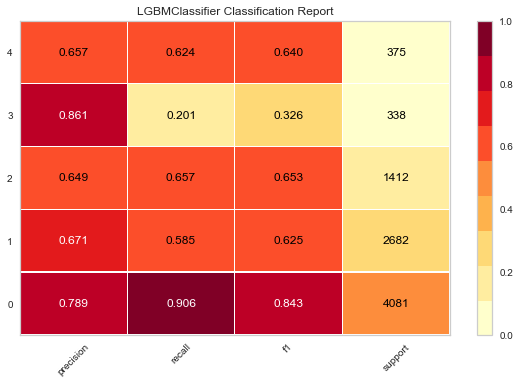

In [16]:
plot_model(final_lgbm, plot = 'class_report')

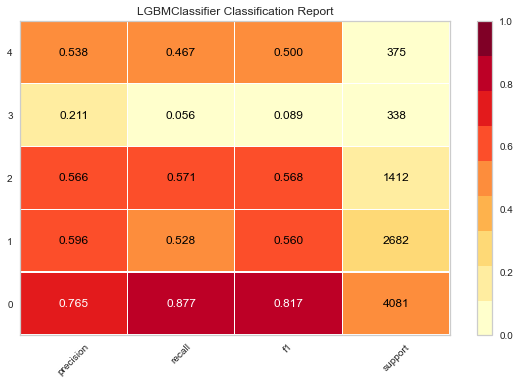

In [17]:
plot_model(best_model, plot = 'class_report')

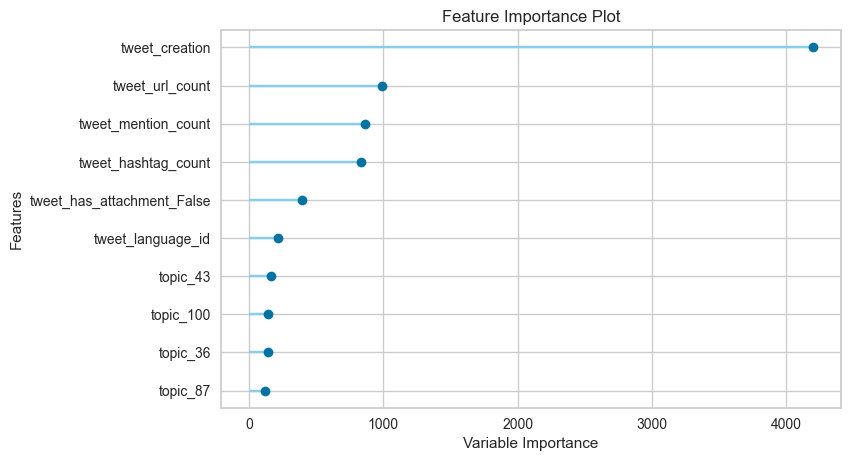

In [18]:
plot_model(final_lgbm, plot = 'feature')

## TESTING DATA

In [19]:
predict_test = predict_model(final_lgbm, data = test_data)
predict_test.head()

,tweet_id,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_language_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,...,topic_82,topic_87,topic_88,topic_89,topic_91,topic_93,topic_98,topic_99,Label,Score
0,6238,5.0,2.0,0.0,True,0,2190,23349,825,2386,...,0,0,0,0,0,0,1,1,1,0.8552
1,6334,1.0,5.0,2.0,True,0,2190,23349,825,2386,...,0,0,0,0,0,0,0,0,2,0.5444
2,5822,1.0,1.0,0.0,False,0,2190,23349,825,2386,...,0,0,0,0,0,0,1,1,1,0.9162
3,6260,0.0,0.0,1.0,False,0,2190,23349,825,2386,...,0,0,0,0,0,0,0,0,1,0.4861
4,6162,1.0,0.0,2.0,False,0,2190,23349,825,2386,...,0,0,0,0,0,0,1,1,2,0.4972


In [20]:
res =  predict_test[['tweet_id', 'Label']]
res.rename(columns={'Label':'virality'},inplace=True)
res

,tweet_id,virality
0,6238,1
1,6334,2
2,5822,1
3,6260,1
4,6162,2
...,...,...
12692,7692,3
12693,7685,3
12694,7771,3
12695,7597,3


In [21]:
res_proper = pd.DataFrame(pd.read_csv("C:\\Users\\deept\\Desktop\\Dataset\\sample_solution_format.csv")["tweet_id"])
res_proper

,tweet_id
0,6238
1,37458
2,23968
3,24137
4,8064
...,...
12692,2418
12693,40872
12694,29847
12695,2939


In [22]:
res_proper = pd.merge(res_proper,res,on="tweet_id")
res_proper

,tweet_id,virality
0,6238,1
1,37458,1
2,23968,5
3,24137,5
4,8064,3
...,...,...
12692,2418,2
12693,40872,3
12694,29847,3
12695,2939,2


In [23]:
res_proper.to_csv('my_prediction_output.csv',header=True,index=False)
# res_proper.to_csv('solution_format.csv',header=True,index=False)